<a href="https://colab.research.google.com/github/vivianusdjpy/DS2-CORE-IP-WEEK-2-/blob/master/WEEK_2_INDEPENDENT_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUESTION

Analysing the state of financial inclusion in Kenya, Uganda, Rwanda and Tanzania

# METRIC FOR SUCCESS
Identifying the most suitable 1000 target clients to open a bank account per country

# 1.INTRODUCTION

# Importing the Libraries

In [0]:
#importing pandas
import pandas as pd

#importing numpy
import numpy as np

#importing matplotlib
import matplotlib.pyplot as plt

#importing searborn
import seaborn as sns

#import pandas profiling
import pandas_profiling
%matplotlib inline

# Importing the data 

In [52]:
#loading the csv file
df = pd.read_csv("/content/Financial Dataset - 1.csv")
df

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [53]:
# Checking whether each column has an appropriate datatype
#
df.dtypes
#year data type needs to be corrected.
#import datetime library
from datetime import datetime
#first convert the date time into string 
df['year'] = df['year'].astype('str')
df['year'] =  pd.to_datetime(df['year'],format='%Y-%m-%d')

print(df.dtypes)

country                           object
year                      datetime64[ns]
uniqueid                          object
Has a Bank account                object
Type of Location                  object
Cell Phone Access                 object
household_size                   float64
Respondent Age                   float64
gender_of_respondent              object
The relathip with head            object
marital_status                    object
Level of Educuation               object
Type of Job                       object
dtype: object


In [54]:
df.shape

(23524, 13)

# Previewing the data using Pandas Profiling

In [10]:
#pandas profiling
pandas_profiling.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,13
Number of observations,23524
Total Missing (%),0.1%
Total size in memory,2.3 MiB
Average record size in memory,104.0 B
Numeric,2
Categorical,10
Boolean,0
Date,1
Text (Unique),0
Rejected,0


# 2.UNIVARIATE ANALYSIS

In [55]:
#Column 1
#country
df['country'].unique() #Kenya,Uganda,Tanzania,Rwanda
df['country'].isnull().sum() #there are 14 null values
df = df[pd.notnull(df['country'])]
df.shape
df

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018-01-01,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018-01-01,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018-01-01,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018-01-01,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018-01-01,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018-01-01,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018-01-01,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018-01-01,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018-01-01,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


AxesSubplot(0.125,0.125;0.775x0.755)


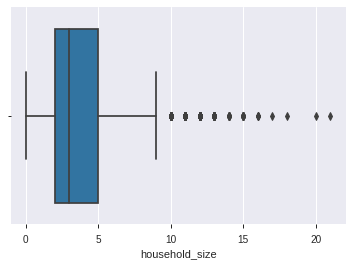

In [89]:
# Checking for Outliers in household_size
#
#we first visualize the outliers for the float and int variables.
print(sns.boxplot(df['household_size']))
# household_size has outliers
plt.show()

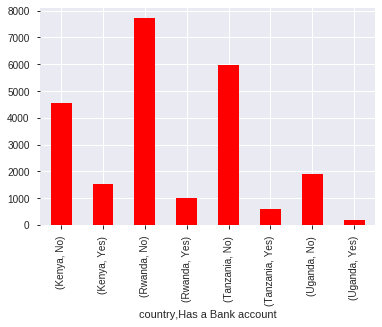

In [90]:
Respondents = df.groupby(['country', 'Has a Bank account'])['Has a Bank account'].count()
Respondents.plot(kind = 'bar', color='red')

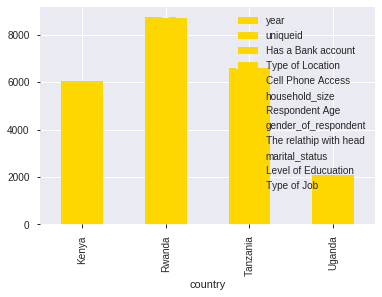

In [95]:
#Plotting a bar chart for each to show the distribution of respondents per country
w=df.groupby (['country']).count()
w.plot(kind='bar', color='gold')

In [98]:
#Column 2 - year
df['year'].unique()
df['year'].value_counts()

2016-01-01    8734
2018-01-01    8167
2017-01-01    6606
2029-01-01       1
2039-01-01       1
2056-01-01       1
Name: year, dtype: int64

In [99]:
#creating a copy
df_1 = df
#dropping the rows with the year entries(2029,2056 and 2039)
df_2 = df_1[(df_1['year'] != 2029) & (df_1['year'] != 2056) & (df_1['year'] != 2039)]
df_2['year'].value_counts()
df_2.shape

(23510, 13)

In [64]:
#column 3 - uniqueid
df_2['uniqueid'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23519     True
23520     True
23521     True
23522     True
23523     True
Name: uniqueid, Length: 23510, dtype: bool

In [100]:
#column 4 - Has a bank account
df_3 = df_2
df_3['Has a Bank account'].value_counts()
# has two values only(yes and no)

No     20165
Yes     3309
Name: Has a Bank account, dtype: int64

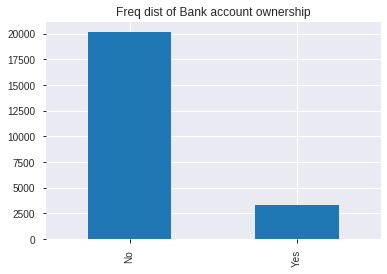

In [101]:
#visualisation of bank account ownership count.
df_2['Has a Bank account'].value_counts().plot.bar(title='Freq dist of Bank account ownership', )
#From the numbers it is clear we are yet to achieve financial inclusion.

In [102]:
#column 5 - Type of Location
df_4 = df_3
df_4['Type of Location'].describe()

count     23495
unique        2
top       Rural
freq      14335
Name: Type of Location, dtype: object

In [103]:
#column 6 - Cell Phone Access
df_5 = df_4
df_5['Cell Phone Access'].describe() #2 distinct values (yes:17440, no:6056)
#df_5['Cell Phone Access'].value_counts()

count     23499
unique        2
top         Yes
freq      17443
Name: Cell Phone Access, dtype: object

In [104]:
#column 7 - household_size
df_6 = df_5
df_6['household_size'].describe()
#count    23479.000000
#mean         3.682780
#std          2.280218
#min          0.000000
#25%          2.000000
#50%          3.000000
#75%          5.000000
#max         21.000000
df_6['household_size'].value_counts()

2.0     5127
1.0     3962
3.0     3531
4.0     3211
5.0     2727
6.0     2031
7.0     1383
8.0      741
9.0      356
10.0     192
12.0      66
11.0      66
0.0       36
13.0      25
15.0      11
14.0       9
16.0       4
18.0       1
20.0       1
21.0       1
17.0       1
Name: household_size, dtype: int64

In [105]:
#colmn 8 - Respondent Age	
df_7 = df_6
df_7['Respondent Age'].describe()
#count    23473.000000
#mean        38.806032
#std         16.518382
#min         16.000000
#25%         26.000000
#50%         35.000000
#75%         49.000000
#max        100.000000
df_7['Respondent Age'].value_counts()

30.0     1052
35.0      834
25.0      789
28.0      746
32.0      714
         ... 
100.0       5
93.0        4
96.0        3
99.0        2
97.0        1
Name: Respondent Age, Length: 85, dtype: int64

In [106]:
#column 9 - gender_of_respondent
df_8 = df_7
df_8['gender_of_respondent'].value_counts()
#Female    13848
#Male       9625
#pie chart

Female    13849
Male       9627
Name: gender_of_respondent, dtype: int64

In [107]:
#column 10 - The relathip with head
df_9 = df_8
df_9['The relathip with head'].value_counts()
#Head of Household      12823
#Spouse                  6513
#Child                   2228
#Parent                  1084
#Other relative           665
#Other non-relatives      190
#histogram/bar charchart

Head of Household      12824
Spouse                  6514
Child                   2228
Parent                  1084
Other relative           666
Other non-relatives      190
Name: The relathip with head, dtype: int64

In [108]:
#column 11 - marital_status
df_10 = df_9
df_10['marital_status'].value_counts()
#count                       23475
#unique                          5
#top       Married/Living together
#freq                        10735
#Married/Living together    10735
#Single/Never Married        7966
#Widowed                     2697
#Divorced/Seperated          2069
#Dont know                      8

Married/Living together    10737
Single/Never Married        7967
Widowed                     2697
Divorced/Seperated          2069
Dont know                      8
Name: marital_status, dtype: int64

In [109]:
#column 12 - Level of Educuation
df_11 = df_10
df_11['Level of Educuation'].describe()
#count                 23478
#unique                    7
#top       Primary education
#freq                  12769
df_11['Level of Educuation'].value_counts()
#Primary education                  12769
#No formal education                 4499
#Secondary education                 4217
#Tertiary education                  1155
#Vocational/Specialised training      803
#6                                     27
#Other/Dont know/RTA                    8

Primary education                  12770
No formal education                 4499
Secondary education                 4218
Tertiary education                  1156
Vocational/Specialised training      803
6                                     27
Other/Dont know/RTA                    8
Name: Level of Educuation, dtype: int64

In [110]:
#column 13 - Type of Job
df_12 = df_11
df_12['Type of Job'].describe()
#count             23477
#unique               10
#top       Self employed
#freq               6420
df_12['Type of Job'].value_counts()
#Self employed                   6420
#Informally employed             5585
#Farming and Fishing             5433
#Remittance Dependent            2520
#Other Income                    1080
#Formally employed Private       1054
#No Income                        625
#Formally employed Government     387
#Government Dependent             247
#Dont Know/Refuse to answer       126

Self employed                   6420
Informally employed             5586
Farming and Fishing             5433
Remittance Dependent            2521
Other Income                    1080
Formally employed Private       1055
No Income                        625
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: Type of Job, dtype: int64

# Anomalies in the data

# Assumptions

In [0]:
1. There are fourteen missing records in the countries column
Recommendation: Drop the rows

2.The dataframe contains one data record from each of the future years (2029,2056 and 2039)
Recommendation: The wrong entries may be due to a typing error thus drop the rows.

3.The uniqueid column has duplicate interviwee entries but different entries in the other column entries.

In [111]:
df_12

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018-01-01,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018-01-01,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018-01-01,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018-01-01,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018-01-01,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018-01-01,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018-01-01,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018-01-01,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018-01-01,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


# 3.BIVARIATE ANALYSIS

In [112]:
#correlation between owning a cellphone and having a bank account
#checking for correlation of the numerical variables
df_12.corr()
#there is very weak negative correlation between the variables

,household_size,Respondent Age
household_size,1.000000,-0.119729
Respondent Age,-0.119729,1.000000


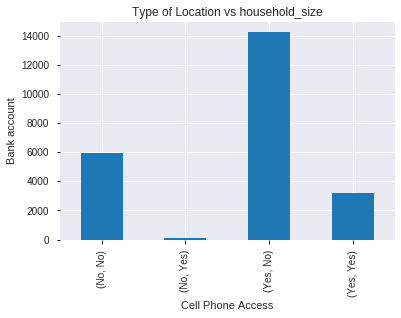

In [115]:
#location vs household size
# Plotting our barplot
df_12.groupby(['Cell Phone Access','Has a Bank account'])['Has a Bank account'].count().plot(kind='bar')

# Giving our barplot a title
plt.title('Type of Location vs household_size')

#Labelling our x axis
plt.xlabel('Cell Phone Access')

#Labelling our y axis
plt.ylabel('Bank account')

#Displaying our scatterplot 
plt.show()

In [0]:
#Age and Gender

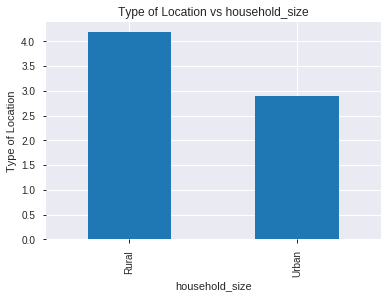

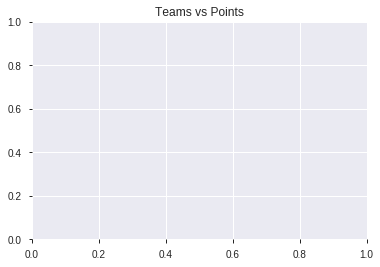

In [128]:
#Cell phone access
# Plotting our barplot
df_12.groupby('Type of Location')['household_size'].mean().plot(kind='bar')

# Giving our barplot a title
plt.title('Type of Location vs household_size')

#Labelling our x axis
plt.xlabel('household_size')

#Labelling our y axis
plt.ylabel('Type of Location')

#Displaying our scatterplot 
plt.show()

# Adding a title
plt.title("Teams vs Points")

# Displaying our chart
plt.show()

In [0]:
#Marital Status

In [0]:
#Level of Education

In [0]:
#Occupation

# 4.MULTIVARIATE ANALYSIS

In [129]:
#Preprocessing
#divide the dataset into a feature set and corresponding labels
X = df_12.iloc[:, 6:-5].values
#y = df2[['country',	'year',	'uniqueid',	'Has a Bank account',	'Type of Location',	'Cell Phone Access','gender_of_respondent'	,'The relathip with head'	,'marital_status','Level of Educuation'	,'Type of Job']].values
y=df_12['gender_of_respondent']
y

0        Female
1        Female
2          Male
3        Female
4          Male
          ...  
23519    Female
23520    Female
23521    Female
23522    Female
23523      Male
Name: gender_of_respondent, Length: 23510, dtype: object

In [130]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test

(array([[ 2., 35.],
        [ 3., 27.],
        [ 4., 28.],
        ...,
        [ 4., 32.],
        [ 6., 28.],
        [ 4., 31.]]), array([[ 1., 45.],
        [ 8., 66.],
        [ 1., 29.],
        ...,
        [ 2., 70.],
        [ 2., 45.],
        [ 5., 25.]]), 20920    Female
 22668    Female
 10228    Female
 8380       Male
 11482    Female
           ...  
 13123      Male
 19662      Male
 9845       Male
 10799    Female
 2732       Male
 Name: gender_of_respondent, Length: 18808, dtype: object, 1641       Male
 7781     Female
 20262    Female
 9914     Female
 22528    Female
           ...  
 19847    Female
 15966    Female
 20361      Male
 18466      Male
 9494     Female
 Name: gender_of_respondent, Length: 4702, dtype: object)

In [0]:
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [136]:
# Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

ValueError: ignored

In [137]:
#Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

AttributeError: ignored

In [138]:
#Using 2 Principal Component Analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

ValueError: ignored

In [139]:
#Training and Making Predictions
#we use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: ignored

In [140]:
#Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

NameError: ignored

# Discriminant Analysis

In [0]:
#Preprocessing
#divide the dataset into a feature set and corresponding labels
A = df2.iloc[:, 6:-5].values
#b = df2[['country',	'year',	'uniqueid',	'Has a Bank account',	'Type of Location',	'Cell Phone Access','gender_of_respondent'	,'The relathip with head'	,'marital_status','Level of Educuation'	,'Type of Job']].values
b=df2['gender_of_respondent']

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=0)
A_train, A_test, b_train, b_test

In [0]:
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)

In [0]:
#performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
A_train = lda.fit_transform(A_train, b_train)
A_test = lda.transform(A_test)

In [0]:
#Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(A_train, b_train)
b_pred = classifier.predict(A_test)

In [0]:
#Evaluating the Performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(b_test, b_pred))
print('Accuracy' + str(accuracy_score(b_test, b_pred)))

# RECOMMENDATIONS

In [0]:
1. Kenya has a significantly higher number of people with bank accounts thus bank managers from other countries
should bench mark with Kenya in a bid to improve banking in their countries
2. Banks should give incentives and create awareness on the need and benefits of owning a bank account
3. Most people in the Rural setting do not own a bank account which may be due to lack of 
information thus banks should create awareness
4. Banks should focus on mobile banking since there is a significant population with mobile phone access but no bank accounts